In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [10]:
def resample_numpy(t_arr, x_arr, factor=2):
    new_time = np.linspace(t_arr[0], t_arr[-1], int(factor*len(t_arr)))
    return new_time, np.interp(new_time, t_arr, x_arr)

In [77]:
filenames = [r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\321-003.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\321-001p.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\321-002.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\315-005p.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\315-003_FILTERED.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\314-020_FILTERED.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\283-012_FILTERED.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\LT 947-1.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\LT 947-2.csv',
            r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\LT 950.csv'
            ]
allspeeds = []
for filename in filenames:
    data = pd.read_csv(filename,skiprows=22) 
    data.drop('Unnamed: 8',inplace=True,axis=1)
    endd = 16750
    time_arr = data['Time'].iloc[0:endd].to_numpy()
    speed_arr = data['Chan 0:SPEED SENSOR'].iloc[0:endd].to_numpy()
    speeds = []
    facs = np.arange(2,25,.5)
    for fac in facs:
        resampled_time1, resampled_arr1 = resample_numpy(time_arr, speed_arr, factor=fac)
        peaks1, _ = find_peaks(-abs(resampled_arr1 + 100), prominence=35)
        newsamplerate1 = len(resampled_time1) / (resampled_time1[-1] - resampled_time1[0])
        speed_leading1 = newsamplerate1 * 3600 / 1000 / (peaks1[2] - peaks1[0])
        speeds.append(speed_leading1)
    allspeeds.append(speeds)
    
allspeeds

[[100.96755212642437,
  100.96755212642438,
  100.96755212642437,
  100.96755212642437,
  100.99114818908538,
  100.98852585972857,
  100.98642809429246,
  100.98471180557571,
  100.98328160954112,
  100.96755212642437,
  100.98103424047515,
  100.98013532085689,
  100.97934877931915,
  100.9786547822553,
  100.97803790398449,
  100.97748596665721,
  100.98642809429246,
  100.98552907864129,
  100.97613123697977,
  100.97575820185726,
  100.97541625541622,
  100.9751016667359,
  100.98207147530651,
  100.98153364717857,
  100.98103424047515,
  100.98056928005377,
  100.97384333161638,
  100.97364037727618,
  100.97934877931915,
  100.97899126448888,
  100.9786547822553,
  100.9783375296318,
  100.97803790398449,
  100.97775447595465,
  100.98245361982623,
  100.97723122838734,
  100.9769892282214,
  100.97675903401809,
  100.97653980241923,
  100.97633076852553,
  100.98042133899945,
  100.98013532085689,
  100.97986173980183,
  100.97959980188293,
  100.97541625541622,
  100.975255750

In [78]:
df = pd.DataFrame(allspeeds).T
df['factors'] = facs
df = df.set_index('factors')
df

,0,1,2,3,4,5,6,7,8,9
factors,,,,,,,,,,
2.0,100.967552,103.830159,105.554744,115.607577,115.176206,97.504766,105.195015,36.443002,48.642630,50.984087
2.5,100.967552,103.840139,105.544432,115.619949,115.176206,97.504766,105.174533,36.444232,48.647010,50.988900
3.0,100.967552,103.813531,105.537559,115.628199,115.135290,97.504766,105.195015,36.445051,48.642630,50.984087
3.5,100.967552,103.823032,105.532649,115.634093,115.141134,97.479629,105.209650,36.442124,48.645759,50.987525
4.0,100.991148,103.830159,105.528968,115.607577,115.145516,97.504766,105.220629,36.446076,48.648106,50.990103
4.5,100.988526,103.813531,105.549015,115.614450,115.148926,97.504766,105.206398,36.446418,48.645063,50.986761
5.0,100.986428,103.820181,105.544432,115.619949,115.151653,97.487169,105.195015,36.446691,48.647010,50.988900
5.5,100.984712,103.825624,105.540683,115.624449,115.153885,97.488769,105.204328,36.444679,48.648604,50.986275
6.0,100.983282,103.830159,105.537559,115.607577,115.155744,97.504766,105.195015,36.445051,48.646280,50.988098


<AxesSubplot:xlabel='factors'>

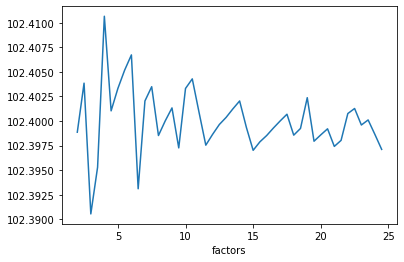

In [80]:
df.median(axis=1).plot()

<AxesSubplot:xlabel='factors'>

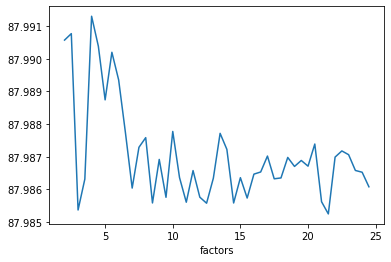

In [81]:
df.mean(axis=1).plot()

<AxesSubplot:xlabel='factors'>

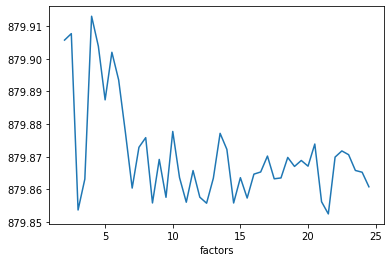

In [82]:
df.sum(axis=1).plot()

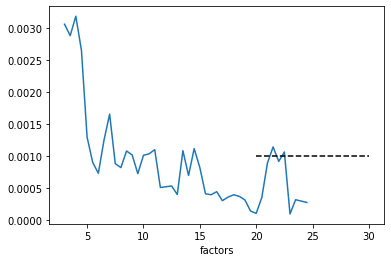

In [83]:
stdd = df.mean(axis=1).rolling(3).std()
stdd.plot()
plt.plot([20,30],[.001,.001],'k--')

In [70]:
print(df[0][stdd < .001].to_string())

factors
20.10    100.976942
20.15    100.974428
20.20    100.976896
20.25    100.979054
20.30    100.981499
20.35    100.978998
20.40    100.976804
20.45    100.978942
20.50    100.976759
20.55    100.978886
20.60    100.976714
20.65    100.978831
20.70    100.981230
20.75    100.978777
20.80    100.981164
20.85    100.978723
20.90    100.976583
20.95    100.978670
21.00    100.976540
21.05    100.978617
21.10    100.980970
21.15    100.978565
21.20    100.980907
21.25    100.978513
21.30    100.976413
21.35    100.978462
21.40    100.976372
21.45    100.978411
21.50    100.976331
21.60    100.980660
21.65    100.978310
21.70    100.980599
21.75    100.978261
21.80    100.976210
21.90    100.976170
21.95    100.978163
22.00    100.980421
22.05    100.978115
22.10    100.980363
22.15    100.978068
22.20    100.976054
22.25    100.978020
22.30    100.976016
22.35    100.982196
22.40    100.980192
22.45    100.977927
22.50    100.980135
22.55    100.977881
22.60    100.980080
22.65    100

In [72]:
time_arr

array([-0.500033, -0.5     , -0.499967, ...,  0.058051,  0.058085,
        0.058118])

In [75]:
%timeit resample_numpy(time_arr,speed_arr,15)

4.01 ms ± 66.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
%timeit resample_numpy(time_arr,speed_arr,22.25)

5.75 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
filename = r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\298-064_FILTERED.csv'
# filename = r'C:\Users\oliphaj.TRN\Documents\calculate speed from data python\321-001p.csv'
testng = pd.read_csv(filename, nrows=50)
print(testng)
testng.shape

                                Headers\t\t\t\t\t\t\t
0   Test Date\t9/7/2022\t9/7/2022\t9/7/2022\t9/7/2...
1   Test Time\t9:59:53 AM\t9:59:53 AM\t9:59:53 AM\...
2   Test ID\t298-064\t298-064\t298-064\t298-064\t2...
3   Test Description\ttest1\ttest1\ttest1\ttest1\t...
4   Sample Rate (Hz)\t30008\t30008\t30008\t30008\t...
5   Hardware AA Filter (-3dB)\t6000\t6000\t6000\t6...
6            Data Channel Number\t1\t2\t3\t4\t5\t6\t7
7   ISO Channel Code\t????????????????\t??????????...
8   Channel Description\tSpeed Sensor\tARS1 Roll A...
9   Channel Location\tNONE\tNONE\tNONE\tNONE\tNONE...
10  Sensor S/N\tSPEED SENSOR\t353\t354\t355\t351\t...
11  Software Filter (SAE Class)\tOther\t180\t180\t...
12  Software Filter (-3dB)\t0\t300\t300\t300\t300\...
13  Engineering Unit\tV \tdeg/s \tdeg/s \tdeg/s \t...
14                         User Comment\t\t\t\t\t\t\t
15  Number of Pre-Zero Data Pts\t15005\t15005\t150...
16  Number of Post-Zero Data Pts\t300081\t300081\t...
17   Data Zero (CNTS)\t3636\

(50, 1)

In [95]:
testng = pd.read_csv(filename, sep='\t', nrows=50)
print(testng)
testng.shape

                         Headers           Unnamed: 1         Unnamed: 2  \
0                      Test Date             9/7/2022           9/7/2022   
1                      Test Time           9:59:53 AM         9:59:53 AM   
2                        Test ID              298-064            298-064   
3               Test Description                test1              test1   
4               Sample Rate (Hz)                30008              30008   
5      Hardware AA Filter (-3dB)                 6000               6000   
6            Data Channel Number                    1                  2   
7               ISO Channel Code     ????????????????   ????????????????   
8            Channel Description         Speed Sensor  ARS1 Roll AR00207   
9               Channel Location                 NONE               NONE   
10                    Sensor S/N         SPEED SENSOR                353   
11   Software Filter (SAE Class)                Other                180   
12        So

(50, 8)

In [97]:
testng.iloc[3][1]

'test1'

In [99]:
testng.iloc[3,10]

IndexError: index 10 is out of bounds for axis 0 with size 8

In [101]:
float('23f')

ValueError: could not convert string to float: '23f'

In [104]:
if False and None:
    print('yes')

In [103]:
if not None:
    print('yes')

yes
